By Arieska Restu Harpian Dwika

# Import Library


In [3]:
import re
import nltk
import random
import warnings
import requests
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")

# Data Understanding

In [4]:
# Download dataset
# !wget --no-check-certificate -o /content/dataset.zip https://drive.google.com/u/0/uc?id=1cELMx_FGlR8O0mM6_SLb7PiFfXotHQ13&export=download

# Unzip dataset
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


In [5]:
# Mendefinisikan lokasi dataset
books_dir = "/content/Books.csv"
ratings_dir = "/content/Ratings.csv"
users_dir = "/content/Users.csv"

In [6]:
# Melakukan data loading
books = pd.read_csv(books_dir)
ratings = pd.read_csv(ratings_dir)
users = pd.read_csv(users_dir)

In [7]:
# Menampilkan informasi pada setiap data books
print('Informasi pada data books : \n')
books.info()

Informasi pada data books : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
# Menampilkan informasi pada setiap data ratings
print('Informasi pada data ratings : \n')
ratings.info()

Informasi pada data ratings : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
# Menampilkan informasi pada setiap data users
print('Informasi pada data users : \n')
users.info()

Informasi pada data users : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
# Menampilkan deskripsi statistik dari setiap data books
print('Deskripsi statistik pada data books : ')
books.describe()

Deskripsi statistik pada data books : 


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [11]:
# Menampilkan deskripsi statistik dari setiap data ratings
print('Deskripsi statistik pada data ratings : ')
ratings.describe()

Deskripsi statistik pada data ratings : 


,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [12]:
# Menampilkan deskripsi statistik dari setiap data users
print('Deskripsi statistik pada data users : ')
users.describe()

Deskripsi statistik pada data users : 


,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [13]:
# Menampilkan jumlah data dan kolom pada tiap dataset
print("Books Shape \t: " ,books.shape )
print("Ratings Shape \t: " ,ratings.shape )
print("Users Shape \t: " ,users.shape )

Books Shape 	:  (271360, 8)
Ratings Shape 	:  (1149780, 3)
Users Shape 	:  (278858, 3)


In [14]:
# Menampilkan jumlah data yg kosong pada tiap dataset
print("Any null values in Books :\n" ,books.isnull().sum())
print()
print("Any null values in Ratings :\n ", ratings.isnull().sum())
print()
print("Any null values in Users :\n",users.isnull().sum())
print()

Any null values in Books :
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Any null values in Ratings :
  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Any null values in Users :
 User-ID          0
Location         0
Age         110762
dtype: int64



# Data Preparation

In [15]:
# Menggabungkan data books dan data ratings berdasarkan ISBN
books_data=books.merge(ratings,on="ISBN")
df=books_data.copy()

In [16]:
# Remove missing values
df.dropna(inplace=True)

In [17]:
# Reset index dan menghapus kolom index yg ada
df.reset_index(drop=True,inplace=True)      

In [18]:
# Menghapus kolom ISBN, Year-Of-Publication, Image-URL-S, Image-URL-M
df.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)     

In [19]:
# Menghapus sample yang memiliki nilai book rating = 0
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)

In [20]:
# Menghapus satu atau lebih karakter non-alfanumerik dalam kolom book title
df["Book-Title"]=df["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())

# Modeling

In [25]:
def book_recommendations(bookTitle):
    bookTitle=str(bookTitle)
    if bookTitle in df["Book-Title"].values:
        rating_count = pd.DataFrame(df["Book-Title"].value_counts())
        rare_books = rating_count[rating_count["Book-Title"]<=200].index
        common_books = df[~df["Book-Title"].isin(rare_books)]

        if bookTitle in rare_books:
            most_common = pd.Series(common_books["Book-Title"].unique()).sample(3).values
            print("No Recommendations for this Book ☹️ \n ")
            print("YOU MAY TRY: \n ")
            print("{}".format(most_common[0]), "\n")
            print("{}".format(most_common[1]), "\n")
            print("{}".format(most_common[2]), "\n")
        else:
            common_books = common_books.drop_duplicates(subset=["Book-Title"])
            common_books.reset_index(inplace=True)
            common_books["index"] = [i for i in range(common_books.shape[0])]

            targets = ["Book-Title","Book-Author","Publisher"]
            common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]

            vectorizer = CountVectorizer()
            common_booksVector = vectorizer.fit_transform(common_books["all_features"])
            similarity = cosine_similarity(common_booksVector)
            index = common_books[common_books["Book-Title"]==bookTitle]["index"].values[0]

            similar_books = list(enumerate(similarity[index]))
            similar_booksSorted = sorted(similar_books,key=lambda x:x[1],reverse=True)[1:6]   # hanya diambil nilai indeks ke 1-5

            books=[]
            for i in range(len(similar_booksSorted)):
                books.append(common_books[common_books["index"]==similar_booksSorted[i][0]]["Book-Title"].item())   # yg diambil judul bukunya
            fig,ax = plt.subplots(1,5,figsize=(17,5))
            fig.suptitle("YOU MAY ALSO LIKE THESE BOOKS",fontsize=40,color="black")

            for i in range(len(books)):
                url = common_books.loc[common_books["Book-Title"]==books[i],"Image-URL-L"][:1].values[0]
                img = Image.open(requests.get(url,stream=True).raw)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title("RATING : {}".format(round(df[df["Book-Title"]==books[i]]["Book-Rating"].mean(),1)),y=-0.20,color="blue",fontsize=22)
                fig.set_facecolor('#ffffff')
                fig.show()
    else:
        print("❌ COULD NOT FIND ❌") 

# Evaluation

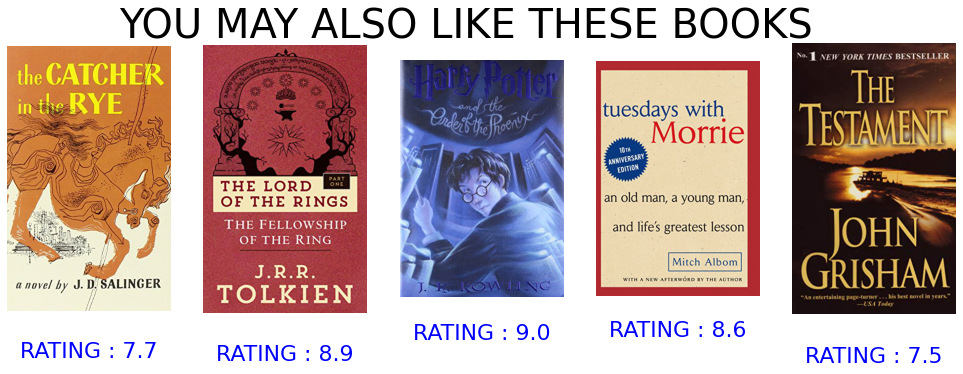

In [26]:
# Mendapatkan rekomendasi buku yang mirip dengan The Five People You Meet in Heaven
book_recommendations("The Five People You Meet in Heaven")

In [27]:
# Mendapatkan rekomendasi buku yang mirip dengan The Angel Is Near
book_recommendations("The Angel Is Near")

No Recommendations for this Book ☹️ 
 
YOU MAY TRY: 
 
The Da Vinci Code 

Suzanne s Diary for Nicholas 

Harry Potter and the Chamber of Secrets Book 2 



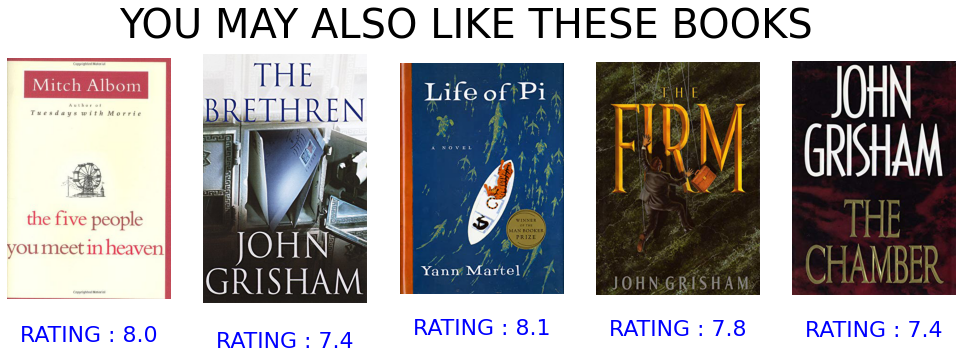

In [28]:
# Mendapatkan rekomendasi buku yang mirip dengan Tuesdays with Morrie An Old Man a Young Man and Life s Greatest Lesson
book_recommendations("Tuesdays with Morrie An Old Man a Young Man and Life s Greatest Lesson")

In [29]:
# Mendapatkan rekomendasi buku yang mirip dengan A Soldier of the Great War
book_recommendations("A Soldier of the Great War")

No Recommendations for this Book ☹️ 
 
YOU MAY TRY: 
 
The Secret Life of Bees 

Interview with the Vampire 

The Fellowship of the Ring The Lord of the Rings Part 1 



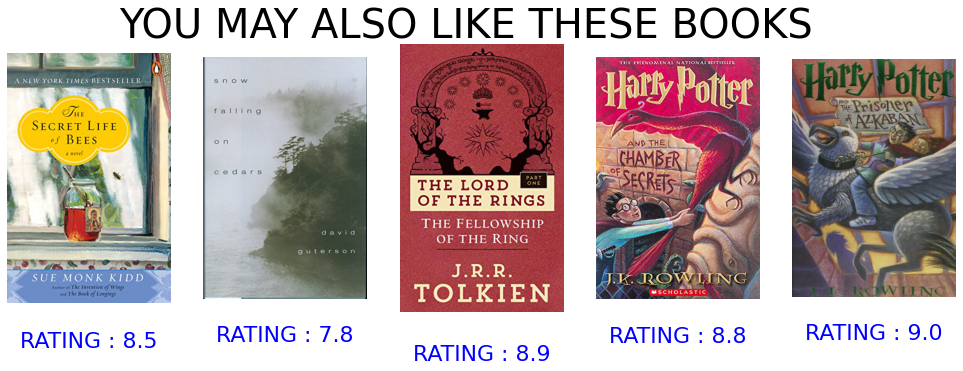

In [30]:
# Mendapatkan rekomendasi buku yang mirip dengan Life of Pi
book_recommendations("Life of Pi")